In [74]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import requests
from config import geoapify_key
import json
import hvplot.pandas
from scipy.stats import linregress
import scipy.stats as stats

In [75]:
# importing table which contain used cars lot in Canada
data_df = pd.read_csv("Dataset/ca-dealers-used.csv")
count = data_df['state'].value_counts()
data_df['state'] = data_df['state'].replace({"OH" : "ON", "SC" :"QC",})
data_df = data_df[data_df['state']!= "WA"]
data_df

/var/folders/qh/th17k7b126bdp6fpt44nzdb80000gn/T/ipykernel_47734/2965129259.py:2: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("Dataset/ca-dealers-used.csv")


,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
0,b39ea795-eca9,19UNC1B01HY800062,179999.0,9966.0,V-P4139,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,edmundston honda,475 Rue Victoria,Edmundston,NB,E3V 2K7
1,026cb5b1-6e3e,19UNC1B02HY800023,179995.0,5988.0,PPAP70374,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,garage daniel lessard,2795 Route-du-prsident-kennedy,Notre-dame-des-pins,QC,G0M 1K0
2,5cd5d5b2-5cc2,19UNC1B02HY800071,168528.0,24242.0,B21085,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,lougheed acura,1388 Lougheed Highway,Coquitlam,BC,V3K 6S4
3,b32473ed-5922,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,drive autogroup,1305 Parkway Suite 600,Pickering,ON,L1V 3P2
4,ac40c9fc-0676,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,acura pickering,575 Kingston Road,Pickering,ON,L1V 3N7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393598,f71c5738-33d8,WDC0G5EB8KF614677,47995.0,22108.0,M0684,2019.0,Mercedes-Benz,GLC-Class,GLC350e,SUV,...,4WD,Automatic,Electric / Unleaded,2.0,I,mercedes-benz granby,1225 Rue Principale,Granby,QC,J2J 0M3
393599,873d76f0-18d2,WDC0G5EB9JF465808,42995.0,55316.0,D13339,2018.0,Mercedes-Benz,GLC-Class,GLC350e,SUV,...,4WD,Automatic,Electric / Unleaded,2.0,I,groupe park avenue - regroupement automobile,8840 Boulevard Taschereau,Brossard,QC,J4X 1C2
393600,7ead9dba-6cdd,WDC0G5EB9JF465808,42995.0,55316.0,D13339,2018.0,Mercedes-Benz,GLC-Class,GLC350e,SUV,...,4WD,Automatic,Electric / Unleaded,2.0,I,le mga centre park avenue la prairie,150-b Boulevard Taschereau,La Prairie,QC,J5R 1S8
393601,efa897c2-a52f,WP1BE2AY4LDA55072,115995.0,NaN,NaN,2020.0,Porsche,Cayenne Coupe,E-Hybrid,SUV,...,4WD,Automatic,Electric / Unleaded,3.0,V,porsche centre winnipeg,660 Pembina Highway,Winnipeg,MB,R3M 2M5


In [76]:
clean_df = data_df[["make","model","year","fuel_type","miles","price","engine_size","body_type","city","state"]]
clean_df

,make,model,year,fuel_type,miles,price,engine_size,body_type,city,state
0,Acura,NSX,2017.0,Electric / Premium Unleaded,9966.0,179999.0,3.5,Coupe,Edmundston,NB
1,Acura,NSX,2017.0,Electric / Premium Unleaded,5988.0,179995.0,3.5,Coupe,Notre-dame-des-pins,QC
2,Acura,NSX,2017.0,Electric / Premium Unleaded,24242.0,168528.0,3.5,Coupe,Coquitlam,BC
3,Acura,NSX,2020.0,Electric / Premium Unleaded,6637.0,220000.0,3.5,Coupe,Pickering,ON
4,Acura,NSX,2020.0,Electric / Premium Unleaded,6637.0,220000.0,3.5,Coupe,Pickering,ON
...,...,...,...,...,...,...,...,...,...,...
393598,Mercedes-Benz,GLC-Class,2019.0,Electric / Unleaded,22108.0,47995.0,2.0,SUV,Granby,QC
393599,Mercedes-Benz,GLC-Class,2018.0,Electric / Unleaded,55316.0,42995.0,2.0,SUV,Brossard,QC
393600,Mercedes-Benz,GLC-Class,2018.0,Electric / Unleaded,55316.0,42995.0,2.0,SUV,La Prairie,QC
393601,Porsche,Cayenne Coupe,2020.0,Electric / Unleaded,NaN,115995.0,3.0,SUV,Winnipeg,MB


In [77]:
data_2_df = pd.read_csv("Dataset/Fuel_Consumption_2000-2022.csv")
data_2_df


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [78]:
data_2_df = data_2_df[["YEAR", "MAKE", "MODEL","FUEL","FUEL CONSUMPTION", "HWY (L/100 km)","COMB (L/100 km)", "COMB (mpg)", "EMISSIONS"]]
data_2_df = data_2_df.rename(columns={"MODEL":"model","MAKE":"make","YEAR":"year","FUEL": "fuel_type"})
data_2_df['fuel_type'] = data_2_df['fuel_type'].replace({'X': 'Unleaded','Z' : 'Premium Unleaded', 'E' : 'Electric','D' : 'Diesel'})


In [79]:
merge_df = pd.merge(clean_df,data_2_df,how = "outer",on = ["make","model","year","fuel_type"])
merge_df

,make,model,year,fuel_type,miles,price,engine_size,body_type,city,state,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,Acura,NSX,2017.0,Electric / Premium Unleaded,9966.0,179999.0,3.5,Coupe,Edmundston,NB,NaN,NaN,NaN,NaN,NaN
1,Acura,NSX,2017.0,Electric / Premium Unleaded,5988.0,179995.0,3.5,Coupe,Notre-dame-des-pins,QC,NaN,NaN,NaN,NaN,NaN
2,Acura,NSX,2017.0,Electric / Premium Unleaded,24242.0,168528.0,3.5,Coupe,Coquitlam,BC,NaN,NaN,NaN,NaN,NaN
3,Acura,NSX,2017.0,Electric / Premium Unleaded,18281.0,155771.0,3.5,Coupe,Montral,QC,NaN,NaN,NaN,NaN,NaN
4,Acura,NSX,2017.0,Electric / Premium Unleaded,18281.0,155771.0,3.5,Coupe,Montral,QC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464897,Volvo,XC40 T5 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,10.7,7.7,9.4,30.0,219.0
464898,Volvo,XC60 B5 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,10.5,8.1,9.4,30.0,219.0
464899,Volvo,XC60 B6 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,11.0,8.7,9.9,29.0,232.0
464900,Volvo,XC90 T5 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,11.5,8.4,10.1,28.0,236.0


In [80]:
#importing 3 table as a csv - this will allow associate cars with the respective countries
manufacturer_df = pd.read_csv("Dataset/manufacturers.csv")
manufacturer_df["make"] = manufacturer_df["make"].str.title()

final_df = pd.merge(merge_df,manufacturer_df[["make","country"]],on = "make")
final_df = final_df.dropna()
final_df.head()


,make,model,year,fuel_type,miles,price,engine_size,body_type,city,state,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,country
1793,Acura,ILX,2018.0,Premium Unleaded,39000.0,19999.0,2.4,Sedan,London,ON,9.4,6.8,8.2,34.0,192.0,Japan
1794,Acura,ILX,2018.0,Premium Unleaded,25661.0,23240.0,2.4,Sedan,Halifax,NS,9.4,6.8,8.2,34.0,192.0,Japan
1795,Acura,ILX,2018.0,Premium Unleaded,21675.0,20999.0,2.4,Sedan,Chatham-kent,ON,9.4,6.8,8.2,34.0,192.0,Japan
1796,Acura,ILX,2018.0,Premium Unleaded,21675.0,21999.0,2.4,Sedan,Leamington,ON,9.4,6.8,8.2,34.0,192.0,Japan
1797,Acura,ILX,2018.0,Premium Unleaded,32144.0,22776.0,2.4,Sedan,Montral,QC,9.4,6.8,8.2,34.0,192.0,Japan


In [81]:
#considering only cars between 2017 and 2022.
final_tweak_df = final_df.loc[(final_df["year"] >= 2017) & (final_df["year"] <= 2022),:]
final_tweak_df.rename(columns={'make': 'BRAND', 'model':'MODEL', 'year':'YEAR','fuel_type':'FUEL TYPE',
                       'state':'STATE', 'miles':'MILES','price': 'PRICE', 'engine_size':'ENGINE SIZE',	
                       'body_type':'BODY TYPE', 'city':'CITY','country':'COUNTRY'}, inplace=True)                      
final_tweak_df

,BRAND,MODEL,YEAR,FUEL TYPE,MILES,PRICE,ENGINE SIZE,BODY TYPE,CITY,STATE,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,COUNTRY
1793,Acura,ILX,2018.0,Premium Unleaded,39000.0,19999.0,2.4,Sedan,London,ON,9.4,6.8,8.2,34.0,192.0,Japan
1794,Acura,ILX,2018.0,Premium Unleaded,25661.0,23240.0,2.4,Sedan,Halifax,NS,9.4,6.8,8.2,34.0,192.0,Japan
1795,Acura,ILX,2018.0,Premium Unleaded,21675.0,20999.0,2.4,Sedan,Chatham-kent,ON,9.4,6.8,8.2,34.0,192.0,Japan
1796,Acura,ILX,2018.0,Premium Unleaded,21675.0,21999.0,2.4,Sedan,Leamington,ON,9.4,6.8,8.2,34.0,192.0,Japan
1797,Acura,ILX,2018.0,Premium Unleaded,32144.0,22776.0,2.4,Sedan,Montral,QC,9.4,6.8,8.2,34.0,192.0,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434802,Alfa Romeo,Stelvio,2020.0,Premium Unleaded,5095.0,53888.0,2.0,SUV,Toronto,ON,10.3,8.1,9.3,30.0,218.0,Italy
434804,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,67719.0,2.0,SUV,Edmonton,AB,10.3,8.1,9.3,30.0,218.0,Italy
434805,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,67719.0,2.0,SUV,Calgary,AB,10.3,8.1,9.3,30.0,218.0,Italy
434806,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,80859.0,2.0,SUV,Edmonton,AB,10.3,8.1,9.3,30.0,218.0,Italy


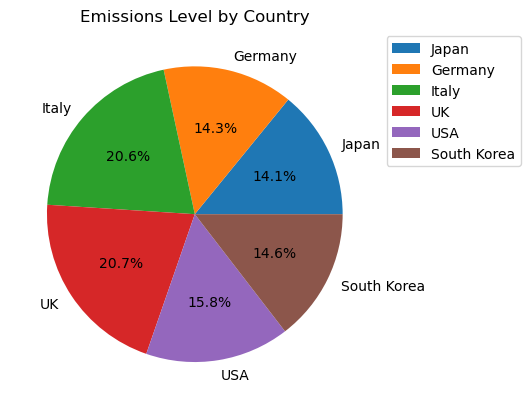

In [82]:
# Generate the mean of emissions level in each country
country_grp_df = final_tweak_df.set_index('COUNTRY')
japan_cars_df = country_grp_df.loc['Japan']['EMISSIONS'].mean()
germany_cars_df = country_grp_df.loc['Germany']['EMISSIONS'].mean()
italy_cars_df = country_grp_df.loc['Italy']['EMISSIONS'].mean()
uk_cars_df = country_grp_df.loc['UK']['EMISSIONS'].mean()
usa_cars_df = country_grp_df.loc['USA']['EMISSIONS'].mean()
korea_cars_df = country_grp_df.loc['South Korea']['EMISSIONS'].mean()
total_emissions = [japan_cars_df, germany_cars_df, italy_cars_df, uk_cars_df, usa_cars_df, korea_cars_df]

countries = ['Japan', 'Germany', 'Italy', 'UK', 'USA', 'South Korea']
total_emissions_df = pd.DataFrame({'Emissions': total_emissions}, index=countries)

# Plot the pie chart
ax = total_emissions_df.plot(kind='pie', y='Emissions', autopct='%1.1f%%', title ='Emissions Level by Country',ylabel='')

# Move the legend outside the chart
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
          
# Display the chart
plt.show()

In [83]:
country_grp_cars = final_tweak_df.groupby("COUNTRY")
country_cars = country_grp_cars['COUNTRY'].count()
print(country_cars)
country_values = final_tweak_df['BODY TYPE'].unique()
print(country_values)

COUNTRY
Germany        11835
Italy            109
Japan          34979
South Korea    27284
UK               378
USA            42629
Name: COUNTRY, dtype: int64
['Sedan' 'Coupe' 'SUV' 'Minivan' 'Pickup' 'Convertible' 'Hatchback'
 'Crossover' 'Cargo Van' 'Targa' 'Wagon']


In [84]:
brand_cars = final_tweak_df['BRAND'].unique().tolist()
print(brand_cars)

['Acura', 'Dodge', 'Chrysler', 'Ford', 'Chevrolet', 'Buick', 'Cadillac', 'Nissan', 'Volkswagen', 'Mercedes-Benz', 'Toyota', 'Lincoln', 'Land Rover', 'Bentley', 'Audi', 'Porsche', 'Maserati', 'Honda', 'Jeep', 'Mazda', 'Hyundai', 'Kia', 'Mitsubishi', 'Subaru', 'Rolls-Royce', 'Aston Martin', 'Lamborghini', 'Alfa Romeo']


In [116]:
def countries_analysis(dataframe,country):
    """
    Function to perform analysis and plot graphs for respective country analysis
    1. to create table of respective country with mean of emissions, Mileage in HWY and COMB
    2. create subplots of the data regarding respective country
    """
    country_cars_mpg = dataframe[dataframe["COUNTRY"]== country]
    emissions = country_cars_mpg.groupby('BRAND')['EMISSIONS'].mean()
    hwy = country_cars_mpg.groupby('BRAND')['HWY (L/100 km)'].mean()
    comb =  country_cars_mpg.groupby('BRAND')['COMB (L/100 km)'].mean()
    mpg = country_cars_mpg.groupby('BRAND')['COMB (mpg)'].mean()
    city_mil = country_cars_mpg.groupby('BRAND')['FUEL CONSUMPTION'].mean()
    summary = ({"COUNTRY" : emissions.index.values,
              "EMISSIONS" : (round(emissions,2)),
              "MILEAGE CITY(L/100 KM)" : round(city_mil),
              "MILEAGE HWY(L/100 KM)" : round(hwy),
              "COMB (L/100 KM)" : round(comb),
              "COMB (MPG)": round(mpg)})
    summary_df = pd.DataFrame(summary)
    summary_df.reset_index(inplace= True, drop = True)
    print(summary_df)
    summary_df['EMISSIONS'] = (summary_df['EMISSIONS']/(summary_df["COMB (MPG)"]*1.609/3.78))
    summary_df.reset_index()
    summary_short_df = summary_df[['COUNTRY','EMISSIONS','MILEAGE CITY(L/100 KM)','MILEAGE HWY(L/100 KM)','COMB (L/100 KM)']]
    multi_plot = summary_short_df.plot(kind="bar",figsize = (20,10))
    # PandasPlot.set_xticklabels() can be used to set the tick labels as well
    multi_plot.set_xticklabels(summary_short_df["COUNTRY"], rotation=45,fontsize = 20, weight = 'bold')
    multi_plot.set_ylabel("L/100 KM")
    multi_plot.set_title(f"{country} Cars  showing emisssions along with Mileage in Highway and COMB")
    legend = multi_plot.legend()
    legend.get_texts()[0].set_text('Emission in L/km')
    plt.show()
    plt.tight_layout()
    


      COUNTRY  EMISSIONS  MILEAGE CITY(L/100 KM)  MILEAGE HWY(L/100 KM)  \
0       Acura     200.66                    10.0                    7.0   
1       Honda     185.58                     9.0                    7.0   
2       Mazda     196.81                     9.0                    7.0   
3  Mitsubishi     161.81                     7.0                    6.0   
4      Nissan     199.58                    10.0                    7.0   
5      Subaru     215.07                    10.0                    8.0   
6      Toyota     194.78                     9.0                    7.0   

   COMB (L/100 KM)  COMB (MPG)  
0              9.0        33.0  
1              8.0        36.0  
2              8.0        34.0  
3              7.0        41.0  
4              9.0        34.0  
5              9.0        31.0  
6              8.0        35.0  


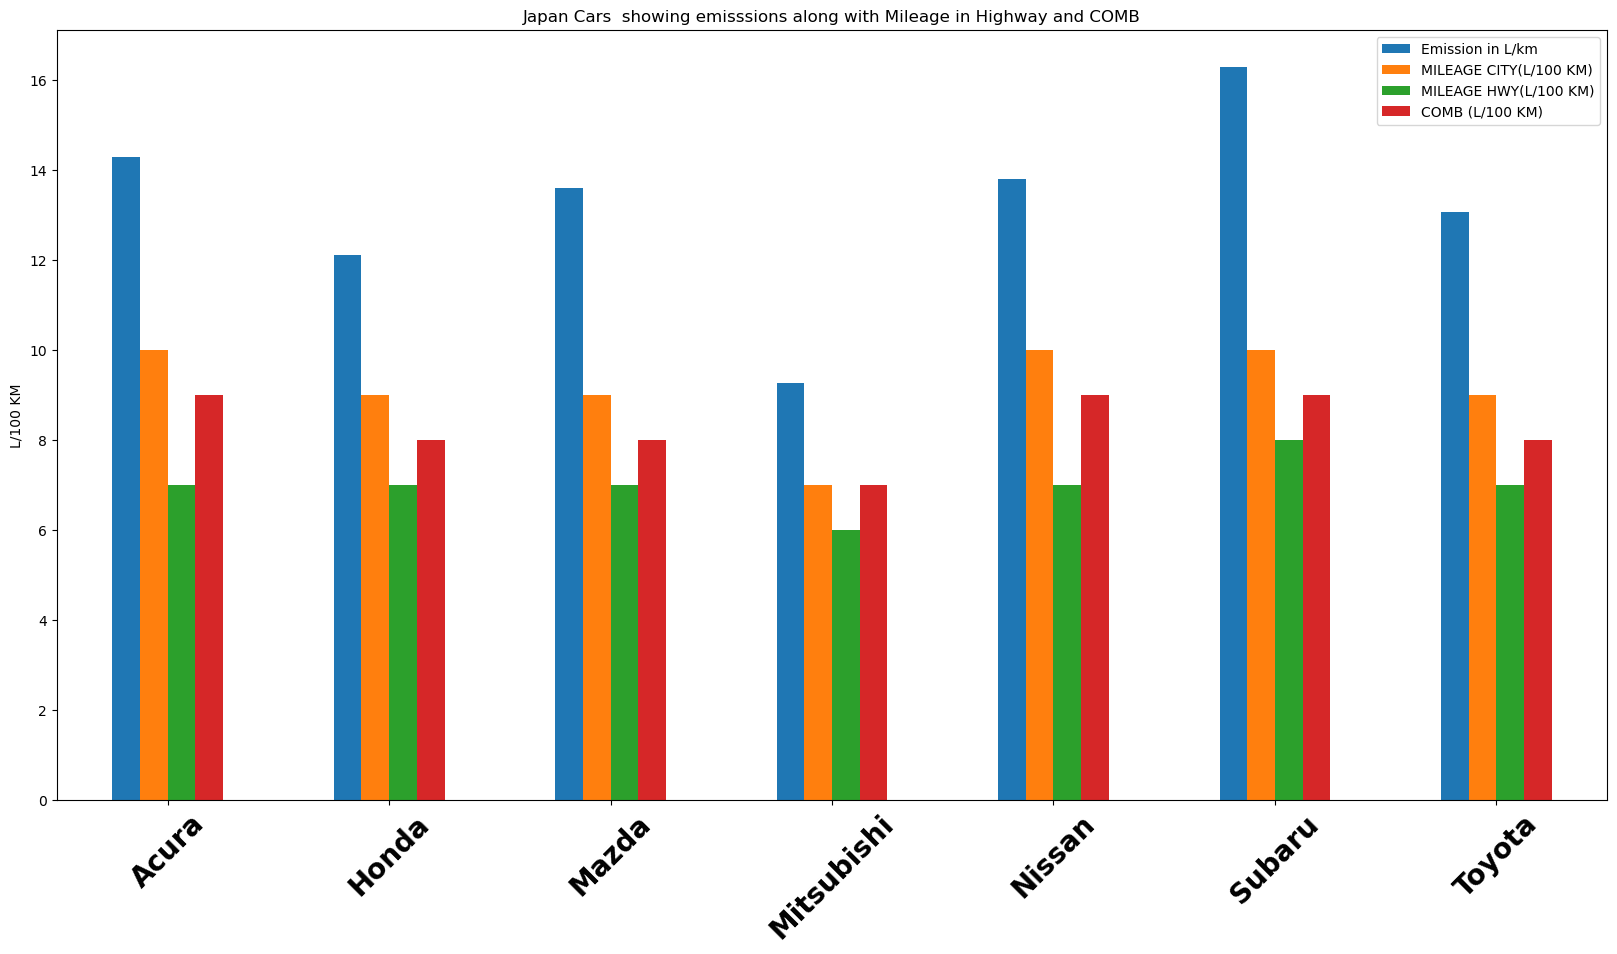

     COUNTRY  EMISSIONS  MILEAGE CITY(L/100 KM)  MILEAGE HWY(L/100 KM)  \
0      Buick     215.28                    10.0                    8.0   
1   Cadillac     237.81                    11.0                    9.0   
2  Chevrolet     197.38                     9.0                    7.0   
3   Chrysler     263.23                    13.0                    9.0   
4      Dodge     267.97                    14.0                    9.0   
5       Ford     233.49                    11.0                    8.0   
6       Jeep     221.85                    11.0                    8.0   
7    Lincoln     254.50                    12.0                    9.0   

   COMB (L/100 KM)  COMB (MPG)  
0              9.0        31.0  
1             10.0        28.0  
2              8.0        35.0  
3             11.0        25.0  
4             11.0        25.0  
5             10.0        29.0  
6              9.0        30.0  
7             11.0        26.0  


<Figure size 640x480 with 0 Axes>

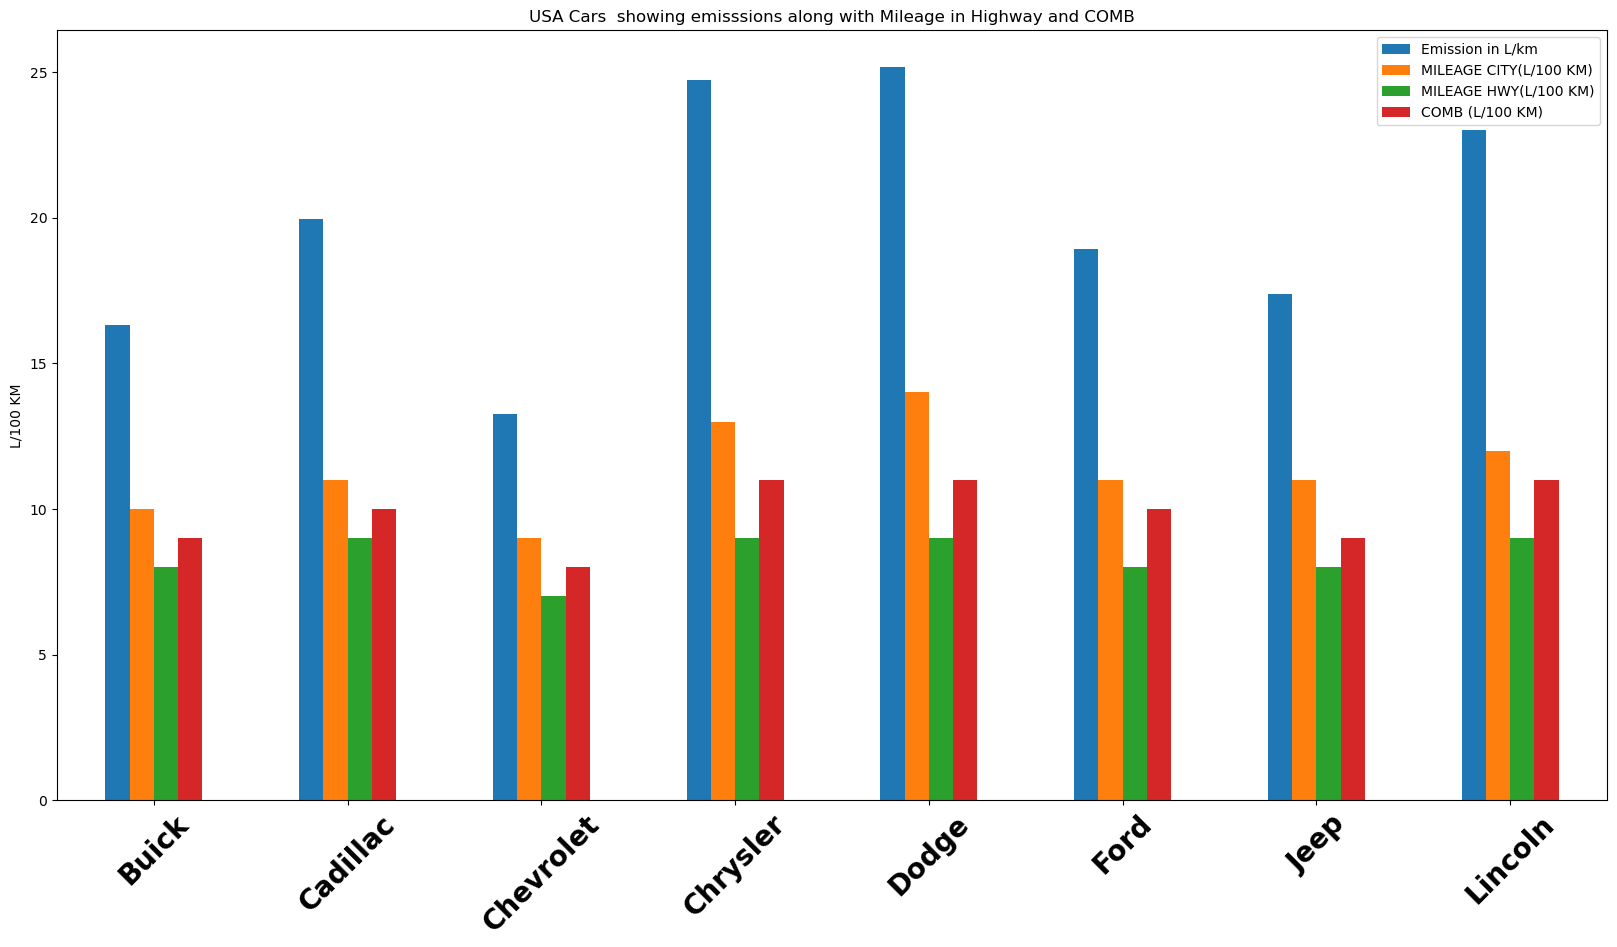

         COUNTRY  EMISSIONS  MILEAGE CITY(L/100 KM)  MILEAGE HWY(L/100 KM)  \
0           Audi     239.85                    11.0                    9.0   
1  Mercedes-Benz     298.89                    14.0                   11.0   
2        Porsche     255.74                    12.0                   10.0   
3     Volkswagen     187.91                     9.0                    7.0   

   COMB (L/100 KM)  COMB (MPG)  
0             10.0        28.0  
1             13.0        22.0  
2             11.0        26.0  
3              8.0        36.0  


<Figure size 640x480 with 0 Axes>

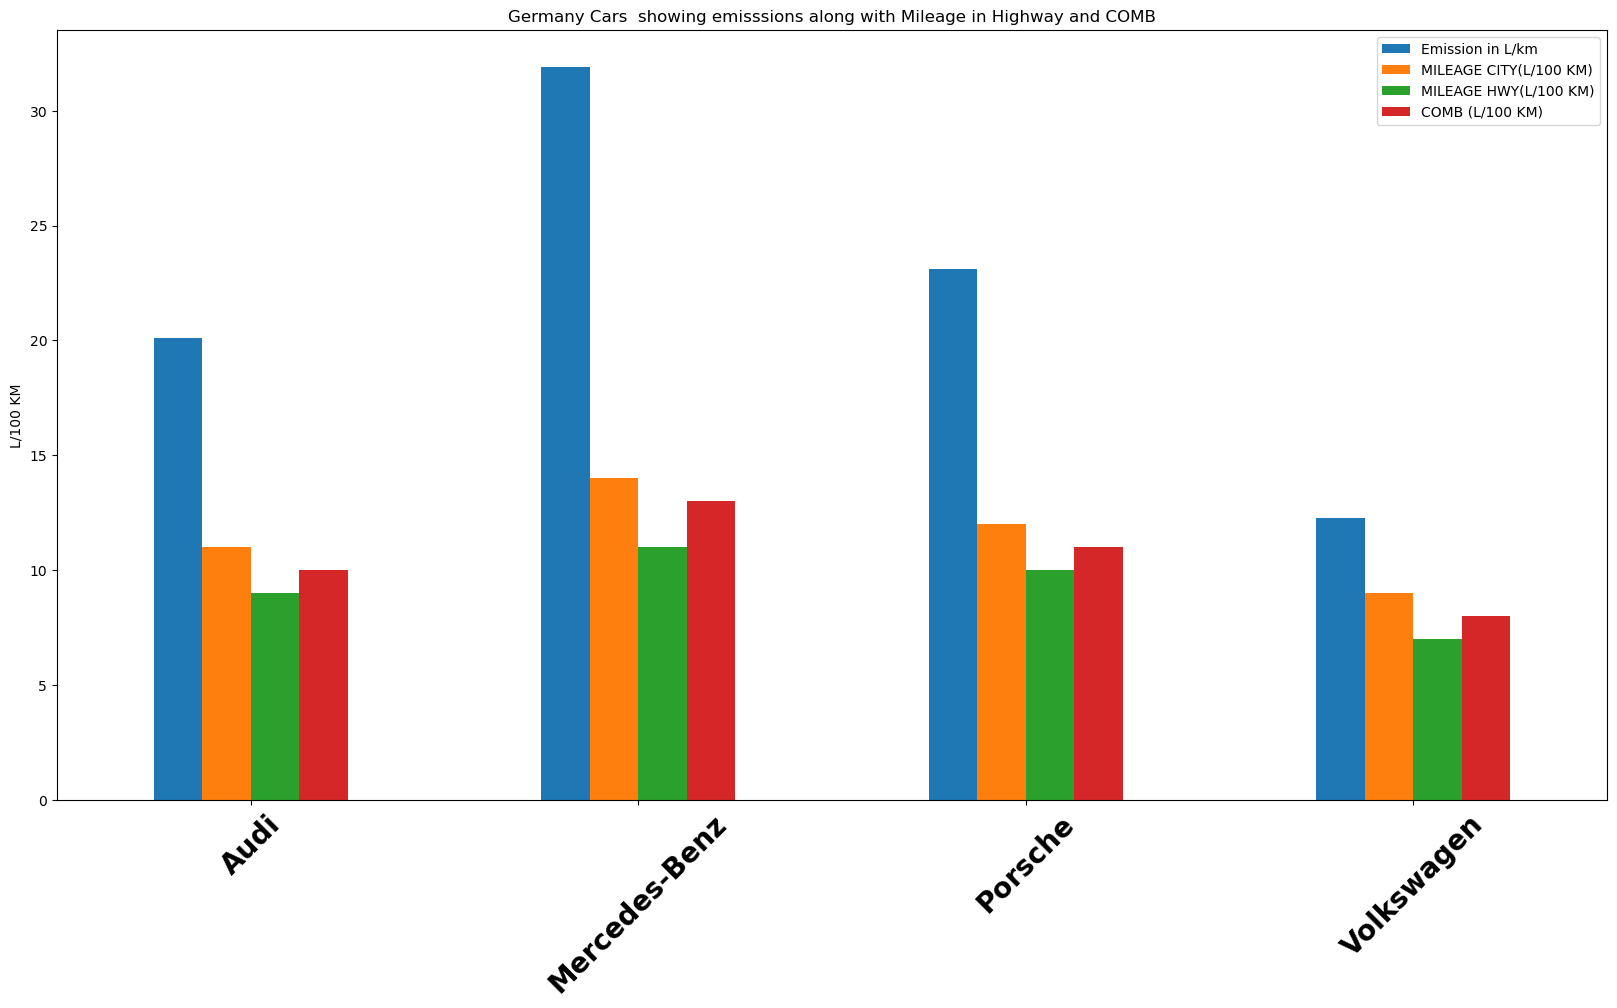

        COUNTRY  EMISSIONS  MILEAGE CITY(L/100 KM)  MILEAGE HWY(L/100 KM)  \
0  Aston Martin     346.00                    18.0                   11.0   
1       Bentley     344.08                    18.0                   11.0   
2    Land Rover     260.61                    12.0                   10.0   
3   Rolls-Royce     391.31                    20.0                   13.0   

   COMB (L/100 KM)  COMB (MPG)  
0             15.0        19.0  
1             15.0        19.0  
2             11.0        26.0  
3             17.0        17.0  


<Figure size 640x480 with 0 Axes>

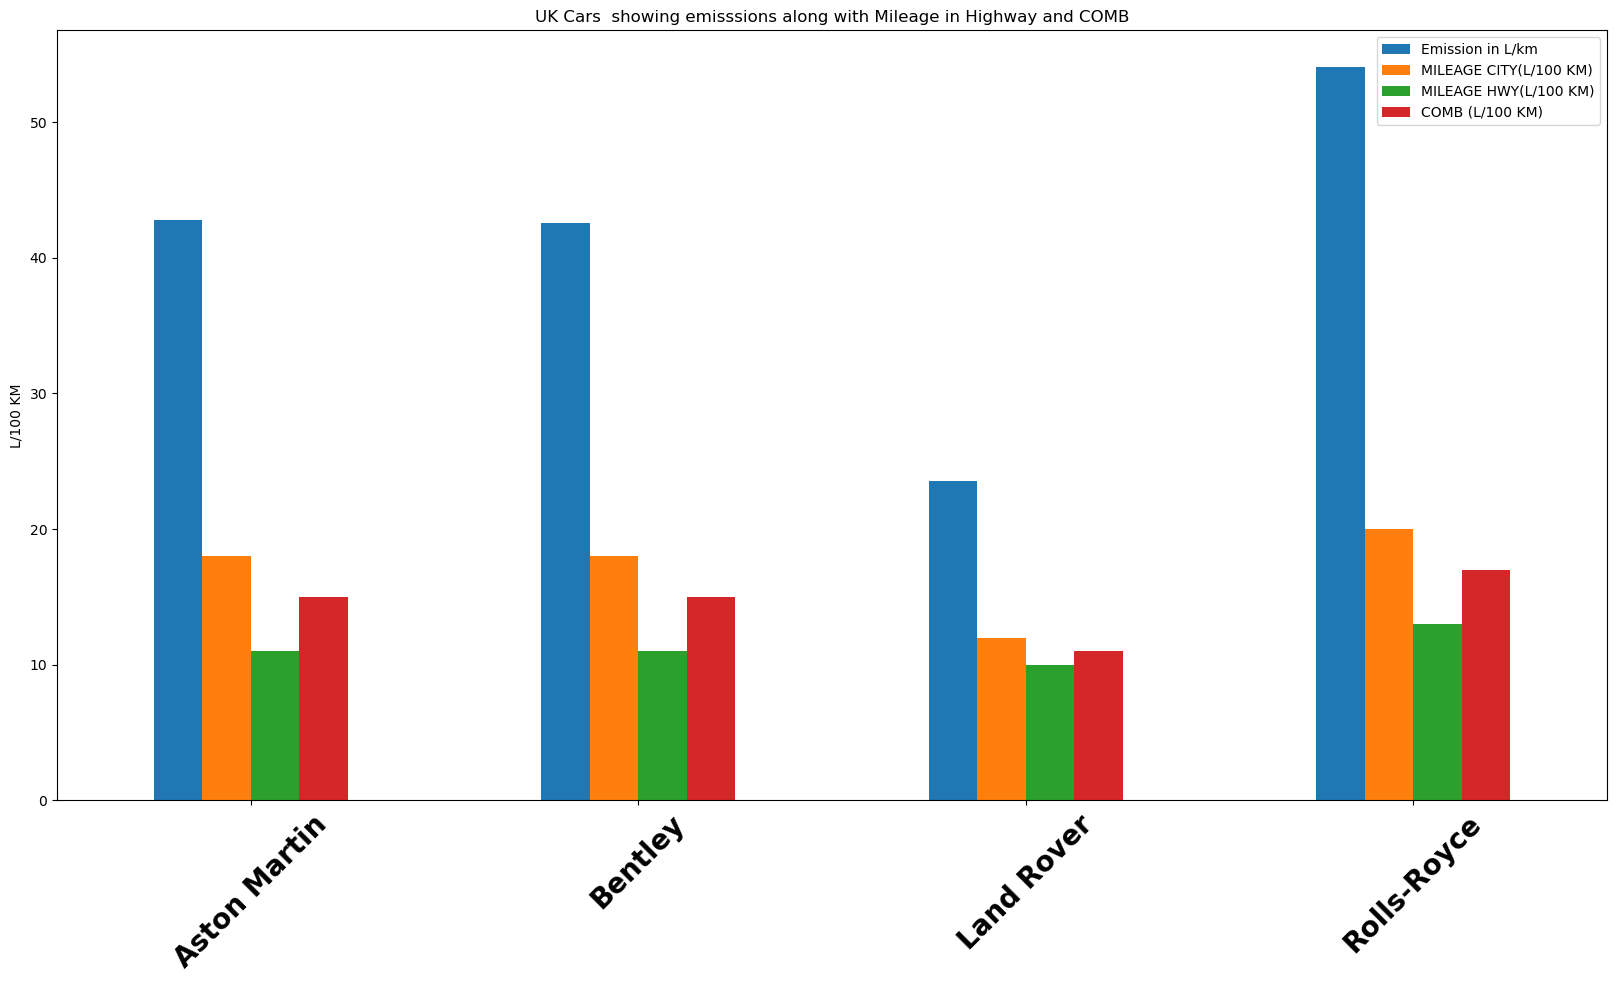

       COUNTRY  EMISSIONS  MILEAGE CITY(L/100 KM)  MILEAGE HWY(L/100 KM)  \
0   Alfa Romeo     211.50                    10.0                    8.0   
1  Lamborghini     372.00                    19.0                   13.0   
2     Maserati     312.54                    15.0                   11.0   

   COMB (L/100 KM)  COMB (MPG)  
0              9.0        31.0  
1             16.0        18.0  
2             13.0        21.0  


<Figure size 640x480 with 0 Axes>

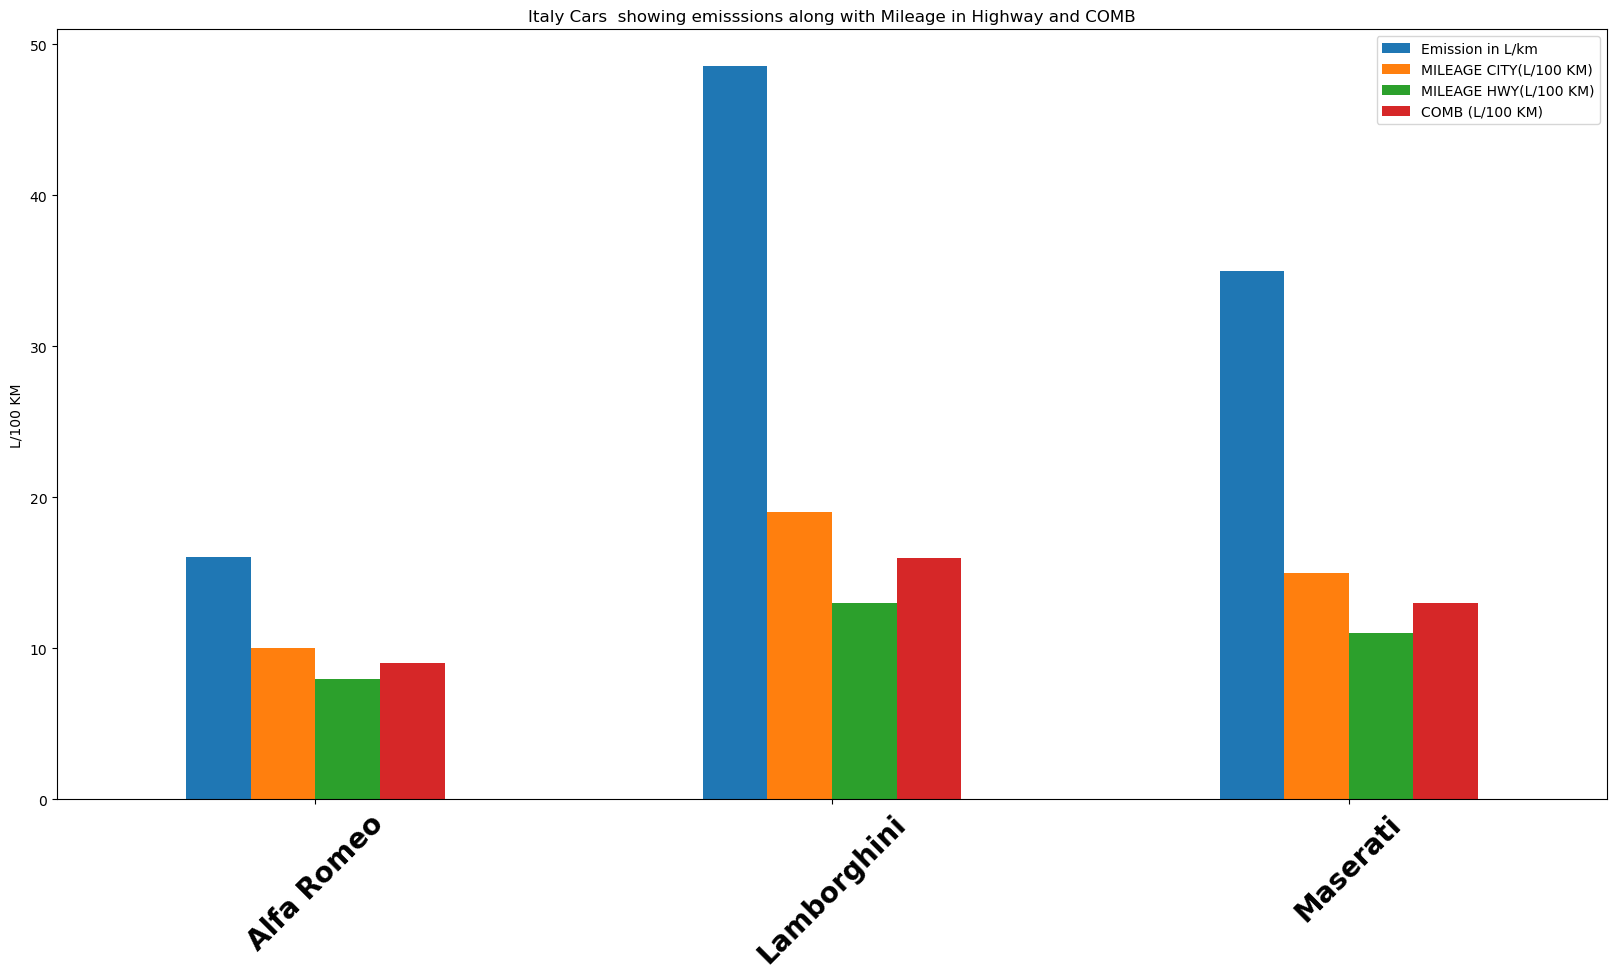

   COUNTRY  EMISSIONS  MILEAGE CITY(L/100 KM)  MILEAGE HWY(L/100 KM)  \
0  Hyundai     198.08                     9.0                    7.0   
1      Kia     207.11                    10.0                    8.0   

   COMB (L/100 KM)  COMB (MPG)  
0              8.0        34.0  
1              9.0        32.0  


<Figure size 640x480 with 0 Axes>

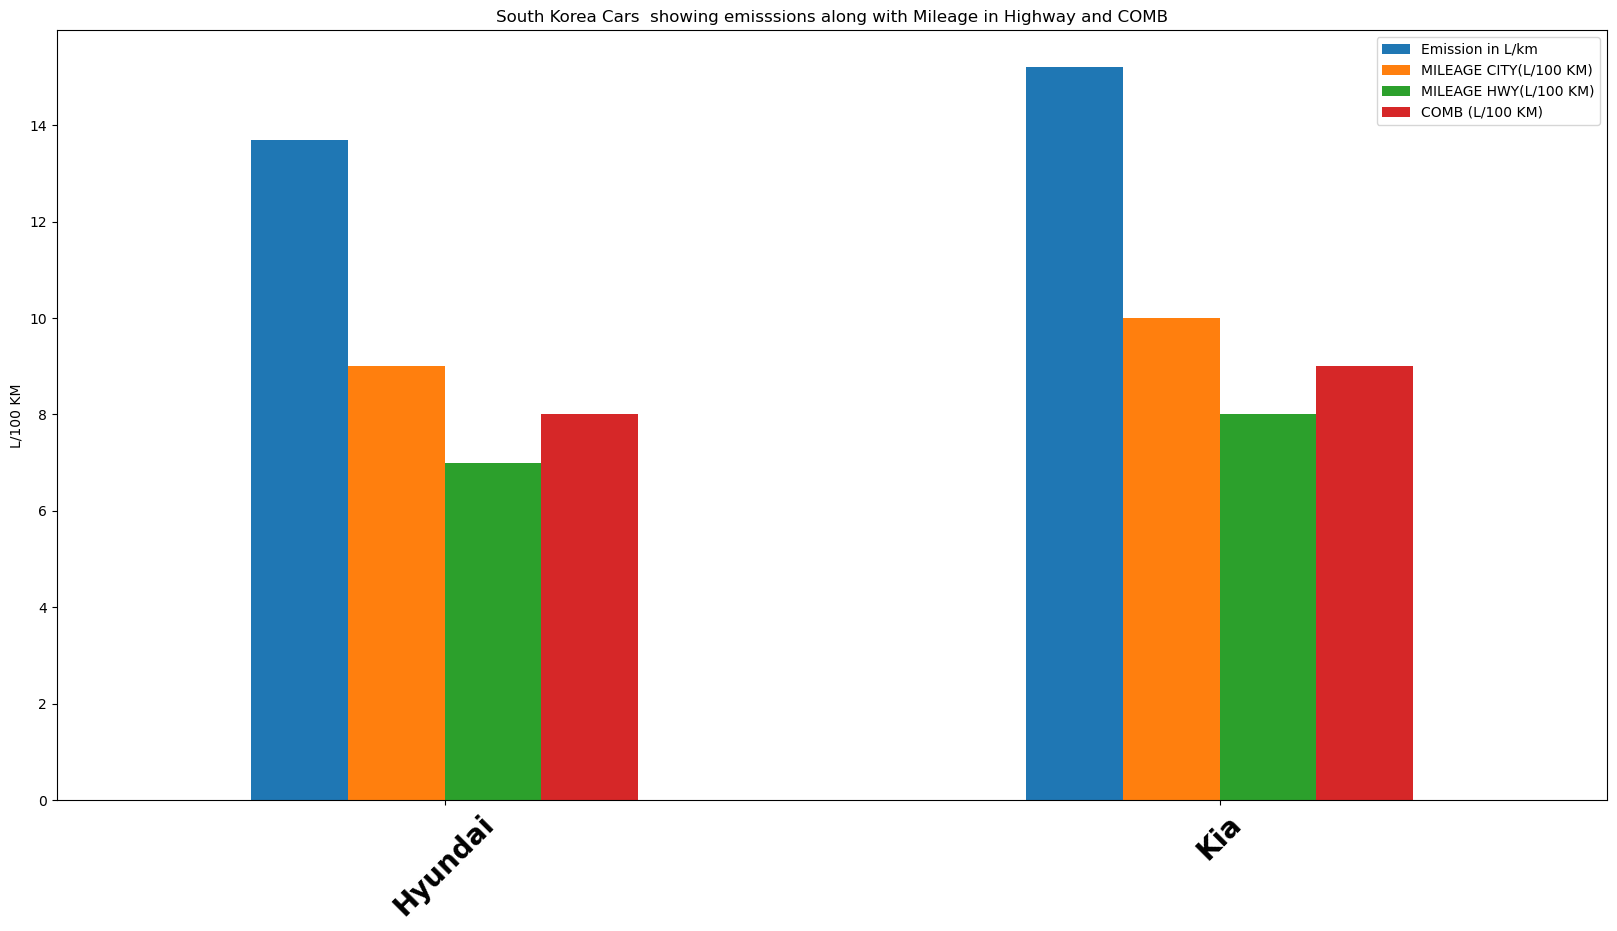

<Figure size 640x480 with 0 Axes>

In [117]:
countries = final_tweak_df["COUNTRY"].unique()
for counts in countries:
    summ = countries_analysis(final_tweak_df,counts)


In [87]:
# Find out what body types of cars are most produced by all countries
car_types = country_grp_df['BODY TYPE'].value_counts()
car_types

SUV            47356
Sedan          39976
Hatchback      16871
Pickup          7936
Coupe           1651
Wagon           1511
Minivan         1225
Convertible      328
Targa            302
Crossover         41
Cargo Van         17
Name: BODY TYPE, dtype: int64

In [88]:
#Lowest emission cars
fuel_eff = final_tweak_df.loc[final_tweak_df['EMISSIONS'] <= 143.0,:]
fuel_eff = fuel_eff.groupby('MODEL').head()
fuel_eff

,BRAND,MODEL,YEAR,FUEL TYPE,MILES,PRICE,ENGINE SIZE,BODY TYPE,CITY,STATE,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,COUNTRY
422185,Mitsubishi,Mirage,2019.0,Unleaded,47400.0,11199.0,1.2,Hatchback,Welland,ON,6.6,5.6,6.2,46.0,143.0,Japan
422187,Mitsubishi,Mirage,2019.0,Unleaded,50400.0,11199.0,1.2,Hatchback,Welland,ON,6.6,5.6,6.2,46.0,143.0,Japan
422189,Mitsubishi,Mirage,2019.0,Unleaded,49565.0,15888.0,1.2,Hatchback,Medicine Hat,AB,6.6,5.6,6.2,46.0,143.0,Japan
422191,Mitsubishi,Mirage,2019.0,Unleaded,49565.0,15888.0,1.2,Hatchback,Airdrie,AB,6.6,5.6,6.2,46.0,143.0,Japan
422193,Mitsubishi,Mirage,2019.0,Unleaded,49565.0,15888.0,1.2,Hatchback,Edmonton,AB,6.6,5.6,6.2,46.0,143.0,Japan


In [119]:
# Most poluuting cars
most_pol = [final_tweak_df['EMISSIONS'].max()]
print(most_pol)
most_poll = final_tweak_df.loc[final_tweak_df['EMISSIONS'] == 400,:]
most_poll

[400.0]


,BRAND,MODEL,YEAR,FUEL TYPE,MILES,PRICE,ENGINE SIZE,BODY TYPE,CITY,STATE,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,COUNTRY
434211,Rolls-Royce,Dawn,2020.0,Premium Unleaded,550.0,548841.0,6.6,Convertible,Laval,QC,20.4,13.1,17.1,17.0,400.0,UK
434212,Rolls-Royce,Dawn,2020.0,Premium Unleaded,550.0,548841.0,6.6,Convertible,Mont-royal,QC,20.4,13.1,17.1,17.0,400.0,UK
434213,Rolls-Royce,Dawn,2020.0,Premium Unleaded,1901.0,489900.0,6.6,Convertible,Mont-royal,QC,20.4,13.1,17.1,17.0,400.0,UK
434214,Rolls-Royce,Dawn,2020.0,Premium Unleaded,1901.0,489900.0,6.6,Convertible,Laval,QC,20.4,13.1,17.1,17.0,400.0,UK


In [90]:
# Calculate the fuel consumption of SUV and Sedan cars from Japanese brands
japanese_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]
japanese_suv = japanese_car_types[japanese_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
japanese_sedan = japanese_car_types[japanese_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [91]:
# Calculate the fuel consumption of SUV and Sedan cars from German brands
germany_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "Germany"]
germany_suv = germany_car_types[germany_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
germany_sedan = germany_car_types[germany_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [92]:
# Calculate the fuel consumption of SUV and Sedan cars from USA brands
usa_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "USA"]
usa_suv = usa_car_types[usa_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
usa_sedan = usa_car_types[usa_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [93]:
# Calculate the fuel consumption of SUV and Sedan cars from UK brands
uk_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "UK"]
uk_suv = uk_car_types[uk_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
uk_sedan = uk_car_types[uk_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [94]:
# Calculate the fuel consumption of SUV and Sedan cars from Italy brands
italy_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "Italy"]
italy_suv = italy_car_types[italy_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
italy_sedan = italy_car_types[italy_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [95]:
# Calculate the fuel consumption of SUV and Sedan cars from Korean brands
korea_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "South Korea"]
korea_suv = korea_car_types[korea_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
korea_sedan = korea_car_types[korea_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()

In [96]:
car_types_summary = {'Country' : ['Japan','Germany','USA','UK','Italy','South Korea'],
           'SUV Fuel Consumption' :[japanese_suv, germany_suv, usa_suv, uk_suv, italy_suv, korea_suv],
           'Sedan Fuel Consumption' : [japanese_sedan,germany_sedan, usa_sedan, uk_sedan, italy_sedan, korea_sedan]}
car_types_df = pd.DataFrame(car_types_summary)
car_types_df

,Country,SUV Fuel Consumption,Sedan Fuel Consumption
0,Japan,9.411280,8.767896
1,Germany,11.050280,8.297013
2,USA,10.552274,9.642283
3,UK,12.725157,19.752941
4,Italy,14.645588,12.327500
5,South Korea,10.064256,9.158132


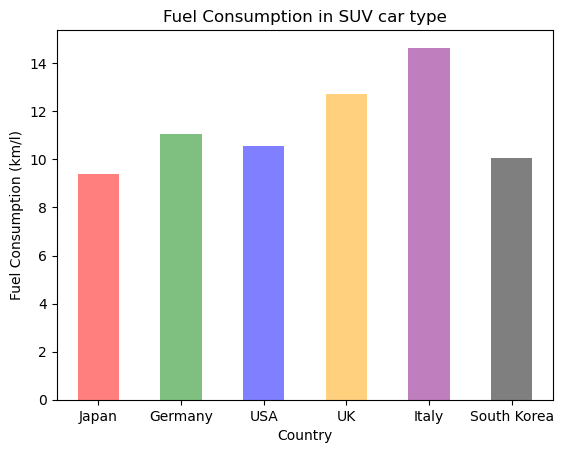

In [97]:
#Plotting chart for Fuel Consumption in SUV car type in every country
car_types_df.plot(kind = 'bar', x = 'Country', y = 'SUV Fuel Consumption', color=['red', 'green', 'blue', 'orange', 'purple','black'], alpha = 0.5, 
               xlabel = 'Country', ylabel = 'Fuel Consumption (km/l)', title = 'Fuel Consumption in SUV car type')
plt.xticks(rotation=0)
plt.legend().remove()
plt.show()

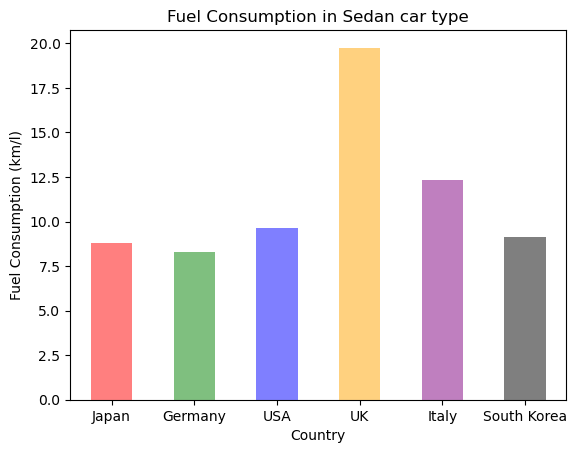

In [98]:
#Plotting chart for Fuel Consumption in Sedan car type in every country
car_types_df.plot(kind = 'bar', x = 'Country', y = 'Sedan Fuel Consumption', color=['red', 'green', 'blue', 'orange', 'purple','black'], alpha = 0.5, 
               xlabel = 'Country', ylabel = 'Fuel Consumption (km/l)', title = 'Fuel Consumption in Sedan car type')
plt.xticks(rotation=0)
plt.legend().remove()
plt.show()

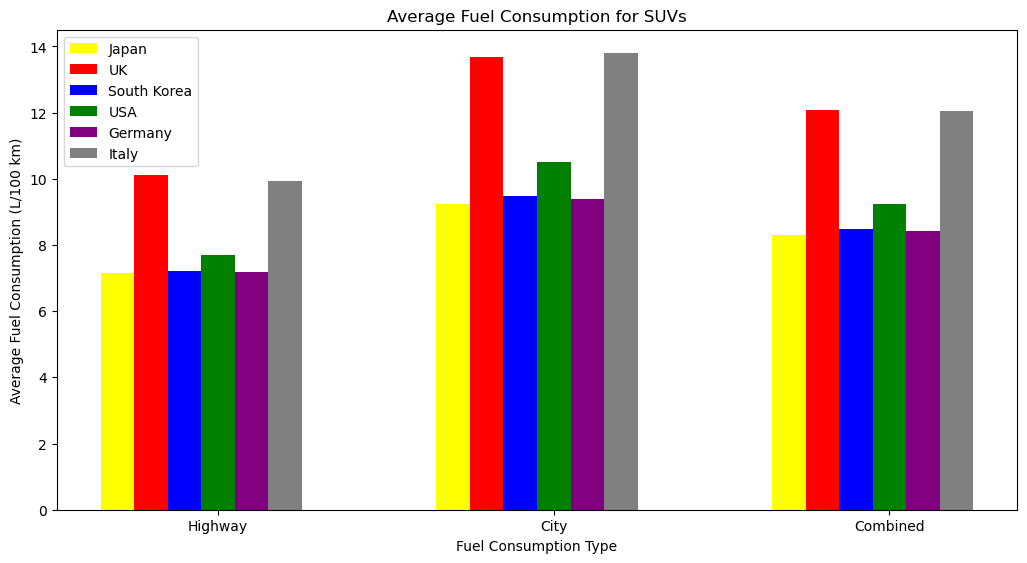

In [99]:
# Data for Japan
japan_suv_highway = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]['HWY (L/100 km)'].mean()
japan_suv_city = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]['FUEL CONSUMPTION'].mean()
japan_suv_combined = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]['COMB (L/100 km)'].mean()

# Data for UK
uk_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "UK"]['HWY (L/100 km)'].mean()
uk_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "UK"]['FUEL CONSUMPTION'].mean()
uk_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "UK"]['COMB (L/100 km)'].mean()

# Data for South Korea
korea_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "South Korea"]['HWY (L/100 km)'].mean()
korea_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "South Korea"]['FUEL CONSUMPTION'].mean()
korea_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "South Korea"]['COMB (L/100 km)'].mean()

# Data for USA
us_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "USA"]['HWY (L/100 km)'].mean()
us_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "USA"]['FUEL CONSUMPTION'].mean()
us_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "USA"]['COMB (L/100 km)'].mean()

# Data for Germany
ger_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "Germany"]['HWY (L/100 km)'].mean()
ger_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "Germany"]['FUEL CONSUMPTION'].mean()
ger_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "Germany"]['COMB (L/100 km)'].mean()

# Data for Italy
italy_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "Italy"]['HWY (L/100 km)'].mean()
italy_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "Italy"]['FUEL CONSUMPTION'].mean()
italy_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "Italy"]['COMB (L/100 km)'].mean()

# Data for all countries
fuel_types = ['Highway', 'City', 'Combined']
japan_fuel_consumptions = [japan_suv_highway, japan_suv_city, japan_suv_combined]
uk_fuel_consumptions = [uk_suv_highway, uk_suv_city, uk_suv_combined]
korea_fuel_consumptions = [korea_suv_highway, korea_suv_city, korea_suv_combined]
us_fuel_consumptions = [us_suv_highway, us_suv_city, us_suv_combined]
ger_fuel_consumptions = [ger_suv_highway, ger_suv_city, ger_suv_combined]
italy_fuel_consumptions = [italy_suv_highway, italy_suv_city, italy_suv_combined]


# Set the width of the bars
bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 6))

# Set the positions of the bars on the x-axis
r1 = np.arange(len(fuel_types))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create the grouped bar chart
plt.bar(r1, japan_fuel_consumptions, color='yellow', width=bar_width, label='Japan')
plt.bar(r2, uk_fuel_consumptions, color='red', width=bar_width, label='UK')
plt.bar(r3, korea_fuel_consumptions, color='blue', width=bar_width, label='South Korea')
plt.bar(r4, us_fuel_consumptions, color='green', width=bar_width, label='USA')
plt.bar(r5, ger_fuel_consumptions, color='purple', width=bar_width, label='Germany')
plt.bar(r6, italy_fuel_consumptions, color='grey', width=bar_width, label='Italy')

# Set axis labels, title, and ticks
plt.xlabel('Fuel Consumption Type')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.title('Average Fuel Consumption for SUVs')
ax.set_xticks([r + 3 * bar_width for r in range(len(fuel_types))])
ax.set_xticklabels(fuel_types)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) 

# Add legend
plt.legend()

# Show the chart
plt.show()

In [100]:
# ANOVA
# NULL HYPOTHESIS: THERE IS NO RELATIONSHIP BETWEEN ENGINE SIZE AND EMISSIONS.
# ALTERNATE HYPOTHESIS: THERE IS A RELATIONSHIP BETWEEN ENGINE SIZE AND EMISSIONS.

In [101]:
emission = final_tweak_df.groupby('ENGINE SIZE')['EMISSIONS'].mean()
result = stats.f_oneway(emission.values, emission.index.values)
result


F_onewayResult(statistic=504.1387950918639, pvalue=4.758731823734792e-32)

Discussion: Since the Pvalue is very low pvalue=4.758731823734792e-32, indicating that the engine and emissions have a strong relationship between each other. Hence, we are rejecting the null hypothesis.

In [102]:
#regressional analysis
def linear_regression_plot(x,y,x_cord,y_cord,y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel("ENGINE SIZE (L)")
    plt.ylabel(f'{y_label}')
    plt.grid()
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(x_cord,y_cord),fontsize=12,color="red")

The r-square is 0.782646091967873
y = 33.55x + 130.42


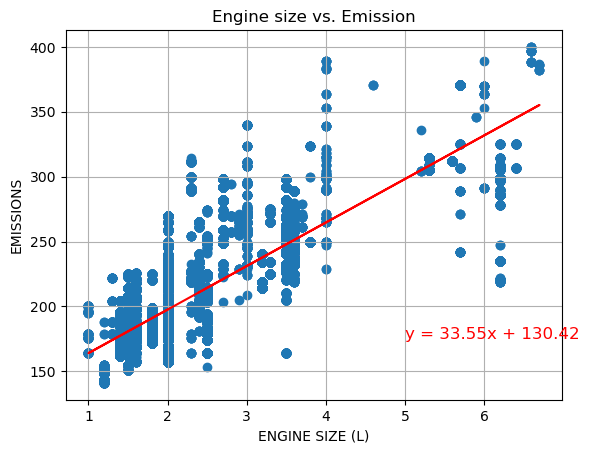

In [103]:
#engine_size vs emissions
x = final_tweak_df['ENGINE SIZE']
y = final_tweak_df['EMISSIONS']
y_label = "EMISSIONS"
x_cord = 5
y_cord = 175
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Engine size vs. Emission")
plt.show()


There is direct relationship between engine size and emissions. As engine size increases the emissions also increase.

In [104]:
#API section
emission_grp = final_tweak_df.groupby('COUNTRY')
emission_grp_mean = round(emission_grp['EMISSIONS'].mean())
emission_grp_count = emission_grp['MODEL'].count()
emission_grp_df = pd.DataFrame({ "EMISSIONS" : emission_grp_mean,
                                "No of cars": emission_grp_count})
emission_grp_df["LATITUDE"] = ""
emission_grp_df["LONGITUDE"] = ""
emission_grp_df["COUNTRY"] = emission_grp_df.index.values
emission_grp_df.reset_index(inplace= True,drop = True)
emission_grp_df["COUNTRY"] = emission_grp_df['COUNTRY'].replace({"UK": "United Kingdom"})
emission_grp_df

,EMISSIONS,No of cars,LATITUDE,LONGITUDE,COUNTRY
0,196.0,11835,,,Germany
1,283.0,109,,,Italy
2,194.0,34979,,,Japan
3,200.0,27284,,,South Korea
4,285.0,378,,,United Kingdom
5,217.0,42629,,,USA


In [105]:
base_url = "https://api.geoapify.com/v1/geocode/search"
params = {
    "apiKey":geoapify_key,
    "format":"json"
}
for index, row in emission_grp_df.iterrows():
    country = row["COUNTRY"]
    params["text"] = f"{country}"
    response = requests.get(base_url, params=params)
    response = response.json()
    emission_grp_df.loc[index,"LATITUDE"] = response["results"][0]["lat"]
    emission_grp_df.loc[index,"LONGITUDE"] = response["results"][0]["lon"]  
emission_grp_df

,EMISSIONS,No of cars,LATITUDE,LONGITUDE,COUNTRY
0,196.0,11835,51.163818,10.447831,Germany
1,283.0,109,42.638426,12.674297,Italy
2,194.0,34979,36.574844,139.239418,Japan
3,200.0,27284,36.638392,127.696119,South Korea
4,285.0,378,54.702354,-3.276575,United Kingdom
5,217.0,42629,39.78373,-100.445882,USA


In [106]:
# Configure the map plot_2
map_plot_2 = emission_grp_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 800,
    frame_height = 500,
    color =  "COUNTRY",
    size = "EMISSIONS"   
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (COUNTRY,EMISSIONS)